In [1]:
!pip install -q -U "tensorflow-text==2.11.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 52.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-datasets 4.9.2 requires protobuf>=3.20, but you have protobuf 3.19.6 which is incompatible.
tensorflow-metadata 1.13.1 requires protobuf<5,>=3.20.3, but you have protobuf 3.19.

In [2]:
!pip install -q tf-models-official==2.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 33.1 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement opencv-python-headless==4.5.2.52 (from tf-models-official) (from versions: 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72)
ERROR: No matching distribution found for opencv-python-headless==4.5.2.52


In [3]:
!git clone https://github.com/tensorflow/models.git

import os
os.environ['PYTHONPATH'] += ":/content/models"

import sys
sys.path.append("/content/models")

Cloning into 'models'...
remote: Enumerating objects: 86228, done.
remote: Counting objects: 100% (1827/1827), done.
remote: Compressing objects: 100% (768/768), done.
remote: Total 86228 (delta 1170), reused 1655 (delta 1040), pack-reused 84401
Receiving objects: 100% (86228/86228), 598.90 MiB | 12.46 MiB/s, done.
Resolving deltas: 100% (61672/61672), done.
Updating files: 100% (3539/3539), done.


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization
import matplotlib.pyplot as plt
tf.get_logger().setLevel("ERROR")

In [5]:
from keras.utils.np_utils import to_categorical

# Data Preprocessing

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/disney/data2.csv")

In [ ]:
#data["Sentiment"] = data["Sentiment"].map({"Satisfied":0 , "Neutral":1 ,"Unsatisfied":2})

In [ ]:
#data[["Review_Text","Sentiment"]].to_csv("/content/drive/MyDrive/disney/data_new.csv",index= False)

In [ ]:
data2 = pd.read_csv("/content/drive/MyDrive/disney/data_new.csv")

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data2["Review_Text"],data2["Sentiment"],test_size = 0.2 ,stratify = data2["Sentiment"])

In [ ]:
TRAIN = pd.DataFrame({"Review_Text":X_train,"Sentiment":y_train})
TEST = pd.DataFrame({"Review_Text":X_test,"Sentiment":y_test})
TRAIN.to_csv('/content/drive/MyDrive/disney/dataset/train.csv',index=False)
TEST.to_csv("/content/drive/MyDrive/disney/dataset/test.csv",index = False)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32
seed = 42

In [ ]:
#batch_size = 64
#dataset = tf.data.experimental.make_csv_dataset("/content/drive/MyDrive/disney/dataset/train.csv",
#                                      batch_size=batch_size,
#                                      label_name = "Sentiment",select_columns=['Review_Text', 'Sentiment'])

In [ ]:
#DATASET_SIZE =pd.read_csv("/content/drive/MyDrive/disney/dataset/train.csv").shape[0]

In [ ]:
disney = pd.read_csv("/content/drive/MyDrive/disney/dataset/train.csv")
label = disney.pop("Sentiment")
label = to_categorical(label)

In [ ]:
input = disney.values.ravel()
data_slices =  tf.data.Dataset.from_tensor_slices((input,label))
dataset = data_slices.batch(64)

In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/disney/dataset/test.csv")
label_test = test_data.pop("Sentiment")
label_test = to_categorical(label_test)
test_data_sliced = tf.data.Dataset.from_tensor_slices((test_data.values.ravel(),label_test))
test_dataset = test_data_sliced.batch(64)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
DATASET_SIZE = len(input)

In [ ]:
train_size = int(0.9*len(input))
val_size = int(0.1*len(input))

In [ ]:
raw_data_train = dataset.take(train_size)
raw_data_val = dataset.skip(train_size)

In [ ]:
data_train = raw_data_train.cache().prefetch(buffer_size=AUTOTUNE)
data_val = raw_data_val.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_train

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [ ]:
#@title Choose a BERT model to fine-tune

bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
text_test = ['London bridge is falling down']
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_mask', 'input_word_ids', 'input_type_ids']
Shape      : (1, 128)
Word Ids   : [ 101 2414 2958 2003 4634 2091  102    0    0    0    0    0]
Input Mask : [1 1 1 1 1 1 1 0 0 0 0 0]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

# Building Model

In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape = (),dtype = tf.string , name = "text")
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name = "preprocessing")
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder , trainable=True,name = "bertmodel")
  outputs = encoder(encoder_inputs)
  net = outputs["pooled_output"]
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(3, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input,net)

In [ ]:
classifier_model = build_classifier_model()

In [ ]:
text_test = ['London bridge is falling down']
bert_check = classifier_model(tf.constant(['London bridge is falling down']))

In [ ]:
bert_check

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[1.1783025 , 0.24601911, 0.48715037]], dtype=float32)>

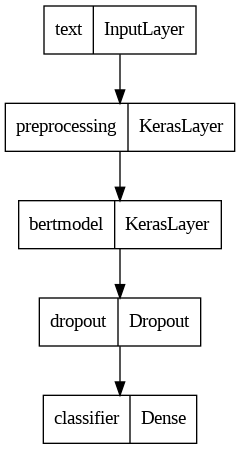

In [ ]:
tf.keras.utils.plot_model(classifier_model)

In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
metrics = tf.metrics.CategoricalAccuracy()

In [ ]:
epochs = 10
steps_per_epoch =   tf.data.experimental.cardinality(data_train).numpy()
num_train_steps = epochs*steps_per_epoch
num_warmup_steps = int(0.1*num_train_steps)
print("Steps per epochs ", int(steps_per_epoch))
print("num_train_steps ", int(num_train_steps))

Steps per epochs  534
num_train_steps  5340


In [ ]:
init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="checkpoint/",
    save_weights_only=True,
    monitor='loss',
    mode='max',
    save_best_only=True)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = classifier_model.fit(x=data_train,
                               validation_data=data_val,
                               callbacks=[callback,model_checkpoint_callback],
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/10
534/534 [==============================] - 285s 525ms/step - loss: 0.5007 - categorical_accuracy: 0.8108
Epoch 2/10
534/534 [==============================] - 280s 525ms/step - loss: 0.3947 - categorical_accuracy: 0.8434
Epoch 3/10
534/534 [==============================] - 279s 523ms/step - loss: 0.3327 - categorical_accuracy: 0.8661
Epoch 4/10
534/534 [==============================] - 280s 524ms/step - loss: 0.2878 - categorical_accuracy: 0.8854
Epoch 5/10
534/534 [==============================] - 280s 525ms/step - loss: 0.2496 - categorical_accuracy: 0.9031
Epoch 6/10
534/534 [==============================] - 279s 523ms/step - loss: 0.2119 - categorical_accuracy: 0.9196
Epoch 7/10
534/534 [==============================] - 279s 522ms/step - loss: 0.1848 - categorical_accuracy: 0.9286
Epoch 8/10
534/534 [==============================] - 281s 526ms/step - loss: 0.1641 - categoric

In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'categorical_accuracy'])


# Accuracy and Model Evaluation

In [ ]:
loss, accuracy = classifier_model.evaluate(test_dataset)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

134/134 [==============================] - 41s 304ms/step - loss: 0.5916 - categorical_accuracy: 0.8413
Loss: 0.591605544090271
Accuracy: 0.8413033485412598


In [ ]:
test_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 1), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
saved_model_path = '/content/drive/MyDrive/disney/disney_bert'.format(dataset_name.replace('/', '_'))

classifier_model.save(saved_model_path, include_optimizer=False)

In [6]:
model = tf.saved_model.load('/content/drive/MyDrive/disney/disney_bert')

In [7]:
model(tf.constant(["The experience was not bad","Ride was nice"])).numpy()

array([[ 0.59167236,  1.6039991 , -0.02576608],
       [ 5.2132716 ,  0.7512849 , -4.603256  ]], dtype=float32)

# Prediction for Manual Input


In [15]:
def predict_Sentiment(text):
  t = tf.constant(text)
  for sent , res in zip(text,model(t).numpy()):
    pred = res
    dics = {0:"Satisfied",1:"Neutral",2:"Unsatisfied"}
    pred = np.where(pred == max(pred))
    print("Review: ", sent)
    print("Sentiment: ","\033[1m"+dics[pred[0][0]])

In [16]:
predict_Sentiment(["The experience was not that bad,Rides are fine"])

Review  The experience was not that bad,Rides are fine
Sentiment Neutral


In [18]:
predict_Sentiment(["First, let me say the staff are wonderful, the ride operators smiling and engaging, the parades professionally done, it is kept free of litter and the food obviously delivered and prepared with as much care as they can (must be awful for French people to have to serve such rubbish).But honestly, the rides are a joke. You get better rides on Great Yarmouth seafront and without having to queue for an hour. The whole park is a little shabby, it is intensley overcrowded. We have been saving our Eurodisney trip for a time when our children could remember it well as it is such an expensive day out, but we would have been better staying in England and going to the seafront.I was well planned, I'd checked all the  rides  and picked out the ones that suited our family, I even researched the  restaurants  so I knew where the options were to eat. Everyone warns about the queues so I didn't want to waste time wondering where to eat or which ride to go on next. On the website there are beautiful, prettily lit pictures talking about Bavarian and African themed restaurants. What they don't tell you is that they are basically just McDonalds Fast food joints with a kebab for the African theme, or a pretzel for the Bavarian. I can see why they do it with such an excessive amount of people coming through the doors, it is probably the best quickest way to serve food, but it is grossly over advertised. My children were so excited to eat in a Lion King inspired restaurant and were disappointed that they were basically in a McDonalds painted in sand colours with a couple of pictures of Pumba and Timon.Similar story with the rides. On the website they talk about a magical ride, an exciting adventure. The best ones were the things you could wander through, like the Sleeping Beauty castle or the Alladdin's cave. But really paying that price so you can wander through a couple of rooms with pictures of the films on them?And waiting over half an hour for a very substandard ghost train (Snow white and the seven dwarves) or a little cart that takes you through scenes from Pinocchio (if you've been to Cadbury World, it isn't as good as the chocobean ride which is silly and cheesy, but a bit of fun, no queue and you get chocolate at the end!) There is a great cart ride in Blackpool Pleasure Beach and you don't have to save up for months to go on it.Getting there was also a hassle, we bought a Eurostar ticket, confidently proclaiming quick and easy access to the park. We (and many more families) were given a ticket with a changeover in Lille of 30 minutes, we were given the option of choosing our seat numbers, which we did, only to find when we finally got to the station because we'd changed the seats we weren't able to go through and someone else had been given our seat s and we were issued with other (separating both me and my husband from our two children   luckily a woman swapped seats with me so I could be near the girls, but she didn't have to). There were a number of families who were rushed and hassled, and though we all got onto the train intact, it was not a great way to end the trip, and as a lasting impression of the day a very sad end for the children.Well done to the hardworking sad, shame on you those grabbing the money hand over fist for such a substandard attraction."])

Review  First, let me say the staff are wonderful, the ride operators smiling and engaging, the parades professionally done, it is kept free of litter and the food obviously delivered and prepared with as much care as they can (must be awful for French people to have to serve such rubbish).But honestly, the rides are a joke. You get better rides on Great Yarmouth seafront and without having to queue for an hour. The whole park is a little shabby, it is intensley overcrowded. We have been saving our Eurodisney trip for a time when our children could remember it well as it is such an expensive day out, but we would have been better staying in England and going to the seafront.I was well planned, I'd checked all the  rides  and picked out the ones that suited our family, I even researched the  restaurants  so I knew where the options were to eat. Everyone warns about the queues so I didn't want to waste time wondering where to eat or which ride to go on next. On the website there are beau

## Example Review from user

First, let me say the staff are wonderful, the ride operators smiling and engaging, the parades professionally done, it is kept free of litter and the food obviously delivered and prepared with as much care as they can (must be awful for French people to have to serve such rubbish).But honestly, the rides are a joke. You get better rides on Great Yarmouth seafront and without having to queue for an hour. The whole park is a little shabby, it is intensley overcrowded. We have been saving our Eurodisney trip for a time when our children could remember it well as it is such an expensive day out, but we would have been better staying in England and going to the seafront.I was well planned, I'd checked all the  rides  and picked out the ones that suited our family, I even researched the  restaurants  so I knew where the options were to eat. Everyone warns about the queues so I didn't want to waste time wondering where to eat or which ride to go on next. On the website there are beautiful, prettily lit pictures talking about Bavarian and African themed restaurants. What they don't tell you is that they are basically just McDonalds Fast food joints with a kebab for the African theme, or a pretzel for the Bavarian. I can see why they do it with such an excessive amount of people coming through the doors, it is probably the best quickest way to serve food, but it is grossly over advertised. My children were so excited to eat in a Lion King inspired restaurant and were disappointed that they were basically in a McDonalds painted in sand colours with a couple of pictures of Pumba and Timon.Similar story with the rides. On the website they talk about a magical ride, an exciting adventure. The best ones were the things you could wander through, like the Sleeping Beauty castle or the Alladdin's cave. But really paying that price so you can wander through a couple of rooms with pictures of the films on them?And waiting over half an hour for a very substandard ghost train (Snow white and the seven dwarves) or a little cart that takes you through scenes from Pinocchio (if you've been to Cadbury World, it isn't as good as the chocobean ride which is silly and cheesy, but a bit of fun, no queue and you get chocolate at the end!) There is a great cart ride in Blackpool Pleasure Beach and you don't have to save up for months to go on it.Getting there was also a hassle, we bought a Eurostar ticket, confidently proclaiming quick and easy access to the park. We (and many more families) were given a ticket with a changeover in Lille of 30 minutes, we were given the option of choosing our seat numbers, which we did, only to find when we finally got to the station because we'd changed the seats we weren't able to go through and someone else had been given our seat s and we were issued with other (separating both me and my husband from our two children   luckily a woman swapped seats with me so I could be near the girls, but she didn't have to). There were a number of families who were rushed and hassled, and though we all got onto the train intact, it was not a great way to end the trip, and as a lasting impression of the day a very sad end for the children.Well done to the hardworking sad, shame on you those grabbing the money hand over fist for such a substandard attraction.

In [17]:
predict_Sentiment(["First, let me say the staff are wonderful, the ride operators smiling and engaging, the parades professionally done, it is kept free of litter and the food obviously delivered and prepared with as much care as they can (must be awful for French people to have to serve such rubbish).But honestly, the rides are a joke. You get better rides on Great Yarmouth seafront and without having to queue for an hour. The whole park is a little shabby, it is intensley overcrowded. We have been saving our Eurodisney trip for a time when our children could remember it well as it is such an expensive day out, but we would have been better staying in England and going to the seafront.I was well planned, I'd checked all the  rides  and picked out the ones that suited our family, I even researched the  restaurants  so I knew where the options were to eat. Everyone warns about the queues so I didn't want to waste time wondering where to eat or which ride to go on next. On the website there are beautiful, prettily lit pictures talking about Bavarian and African themed restaurants. What they don't tell you is that they are basically just McDonalds Fast food joints with a kebab for the African theme, or a pretzel for the Bavarian. I can see why they do it with such an excessive amount of people coming through the doors, it is probably the best quickest way to serve food, but it is grossly over advertised. My children were so excited to eat in a Lion King inspired restaurant and were disappointed that they were basically in a McDonalds painted in sand colours with a couple of pictures of Pumba and Timon.Similar story with the rides. On the website they talk about a magical ride, an exciting adventure. The best ones were the things you could wander through, like the Sleeping Beauty castle or the Alladdin's cave. But really paying that price so you can wander through a couple of rooms with pictures of the films on them?And waiting over half an hour for a very substandard ghost train (Snow white and the seven dwarves) or a little cart that takes you through scenes from Pinocchio (if you've been to Cadbury World, it isn't as good as the chocobean ride which is silly and cheesy, but a bit of fun, no queue and you get chocolate at the end!) There is a great cart ride in Blackpool Pleasure Beach and you don't have to save up for months to go on it.Getting there was also a hassle, we bought a Eurostar ticket, confidently proclaiming quick and easy access to the park. We (and many more families) were given a ticket with a changeover in Lille of 30 minutes, we were given the option of choosing our seat numbers, which we did, only to find when we finally got to the station because we'd changed the seats we weren't able to go through and someone else had been given our seat s and we were issued with other (separating both me and my husband from our two children   luckily a woman swapped seats with me so I could be near the girls, but she didn't have to). There were a number of families who were rushed and hassled, and though we all got onto the train intact, it was not a great way to end the trip, and as a lasting impression of the day a very sad end for the children.Well done to the hardworking sad, shame on you those grabbing the money hand over fist for such a substandard attraction."])

Review  First, let me say the staff are wonderful, the ride operators smiling and engaging, the parades professionally done, it is kept free of litter and the food obviously delivered and prepared with as much care as they can (must be awful for French people to have to serve such rubbish).But honestly, the rides are a joke. You get better rides on Great Yarmouth seafront and without having to queue for an hour. The whole park is a little shabby, it is intensley overcrowded. We have been saving our Eurodisney trip for a time when our children could remember it well as it is such an expensive day out, but we would have been better staying in England and going to the seafront.I was well planned, I'd checked all the  rides  and picked out the ones that suited our family, I even researched the  restaurants  so I knew where the options were to eat. Everyone warns about the queues so I didn't want to waste time wondering where to eat or which ride to go on next. On the website there are beau